# Trabalho 2 de PDI
#### Discente: Ruann Campos de Castro Farrapo

In [2]:
#Importando bibliotecas
import pylab
from skimage import color
from skimage import io
from scipy import signal 

In [3]:
moedas = pylab.imread("moedas.jpeg");
talheres = pylab.imread("talheres.jpg");
bolas_sinuca = pylab.imread("bolas_sinuca.jpg");

# Printando dimensões das imagens
print("Moedas: ", moedas.shape)
print("Talheres: ", talheres.shape)
print("Bolas de sinuca: ", bolas_sinuca.shape)

Moedas:  (429, 581, 3)
Talheres:  (500, 500, 3)
Bolas de sinuca:  (288, 550, 3)


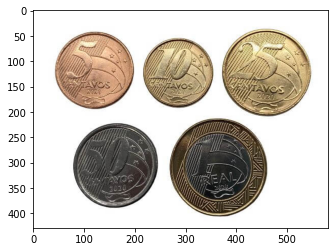

In [4]:
# Apresentando as imagens
pylab.imshow(moedas);

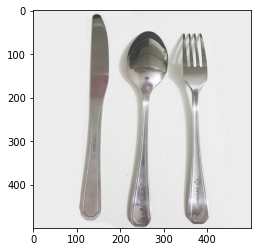

In [5]:
pylab.imshow(talheres);

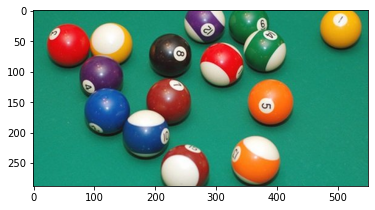

In [6]:
pylab.imshow(bolas_sinuca);

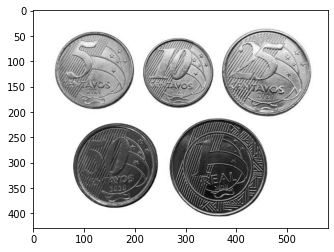

In [7]:
# Imagem em tons de cinza
moedas_cinza = color.rgb2gray(moedas)
pylab.imshow(moedas_cinza,"gray");

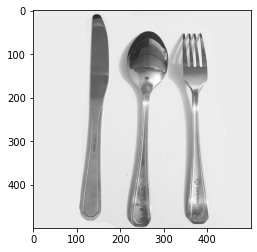

In [8]:
# Imagem em tons de cinza
talheres_cinza = color.rgb2gray(talheres)
pylab.imshow(talheres_cinza,"gray");

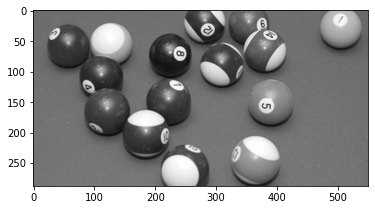

In [9]:
# Imagem em tons de cinza
bolas_cinza = color.rgb2gray(bolas_sinuca)
pylab.imshow(bolas_cinza,"gray");

# Ajuste de contraste

In [10]:
# tipos requeridos: linear, exponencial, logarítmica
# graficos: True, False
def ajuste_de_contraste(img, tipo='lin',  k0=1, k1=1, k2=1, l_1=10, l_2=20, graficos=False):
   

    if tipo == 'lin': 
        if graficos:
            plota_grafico_linear_ajuste_contraste(k0, k1, k2, l_1, l_2)
        return ajuste_linear(img, k0, k1, k2, l_1, l_2)

    elif tipo == 'exp': 
        if graficos:
            plota_grafico_exp_ajuste_contraste(k0)
        return ajuste_exp(img, k0)

    elif tipo == 'log': 
        if graficos:
            plota_grafico_log_ajuste_contraste(k0)
        return ajuste_log(img, k0)

    else: 
        print("Tipo inválido")

In [11]:
# Linear

def plota_grafico_linear_ajuste_contraste(k0, k1, k2, l_1, l_2):
    vet = pylab.arange(0, 256, 1.0)
    
    # Dividir em faixas, dependendo dos valores do usuário
    
    faixa1 = vet[0:l_1]
    faixa1 = (faixa1 - 0)*k0 + 0 # equação da reta, y1 = (x1-x0)*m + y0
    
    faixa2 = vet[l_1:l_2]
    faixa2 = (faixa2 - l_1)*k1 + faixa1[-1]
    
    faixa3 = vet[l_2:256]
    faixa3 = (faixa3 - l_2)*k2 + faixa2[-1]
    
    vet[0:l_1] = faixa1
    vet[l_1:l_2] = faixa2
    vet[l_2:256] = faixa3
    pylab.plot(vet)
    pylab.show()

def ajuste_linear(img_, k0, k1, k2, l_1, l_2):
    vet = pylab.arange(0, 256, 1.0)
    img = pylab.copy(img_)
    
    faixa1 = vet[0:l_1]
    faixa1 = (faixa1 - 0)*k0 + 0
    
    faixa2 = vet[l_1:l_2]
    faixa2 = (faixa2 - l_1)*k1 + faixa1[-1]
    
    faixa3 = vet[l_2:256]
    faixa3 = (faixa3 - l_2)*k2 + faixa2[-1]

    # Para cada faixa de intensidade, é aplicado um k difente, escolhido pelo usuário
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]): 
            if img[i, j] < l_1: 
                img[i,j] = (img[i,j] - 0)*k0 + 0
            elif img[i,j] < l_2: 
                img[i,j] = (img[i,j] - l_1)*k1 + faixa1[-1]   
            else: 
                img[i,j] = (img[i,j] - l_2)*k2 + faixa2[-1]

    return img


In [12]:
# Logarítmica

def plota_grafico_log_ajuste_contraste(k0): 
    # Me baseei no que o professor fez na aula
    f = pylab.vectorize(lambda r,k,L: (L-1)*pylab.log2(k*r+1)/pylab.log2(k*(L-1)+1))
    N = 256
    r = pylab.arange(N)
    pylab.plot(r, f(r, k0, N))
    pylab.show()

def ajuste_log(img_, k0):
    img = pylab.copy(img_)
    f = pylab.vectorize(lambda r,k,L: (L-1)*pylab.log2(k*r+1)/pylab.log2(k*(L-1)+1))
    N = 256 # tons de cinza
    return f(img, k0, N)


In [13]:
# Exponencial

def plota_grafico_exp_ajuste_contraste(k0): 
    # Me baseei no que o professor fez na aula
    g = pylab.vectorize(lambda r,k,L: (L-1)*(2**(k*r)-1)/(2**(k*(L-1))-1))
    N = 256
    r = pylab.arange(N)
    pylab.plot(r, g(r, k0, N))
    pylab.show()
    
def ajuste_exp(img_, k0):
    img = pylab.copy(img_)
    g = pylab.vectorize(lambda r,k,L: (L-1)*(2**(k*r)-1)/(2**(k*(L-1))-1))
    N = 256
    return g(img, k0, N)


# Filtro de imagem

In [14]:
# Tipos: Gaussiana e Mediana
def filtro_de_imagem(img, tipo = 'gaus', n_kernel = 5, sig = 1.):
    
    if tipo == 'gaus': 
        return filtro_gaussiano(img, n_kernel, sig)

    elif tipo == 'medi': 
        return filtro_mediana(img, n_kernel)

    else: 
        print("Tipo inválido")

In [15]:
# Gaussiana

def gera_kernel(n_kernel=5, sig=1.):
    # calculo do kernel gaussiano, com média = 0, e sigma = sig
    # Me baseei em alguns códigos do stackoverflow: 
    # https://stackoverflow.com/questions/29731726/how-to-calculate-a-gaussian-kernel-matrix-efficiently-in-numpy

    ax = pylab.linspace(-(n_kernel - 1) / 2., (n_kernel - 1) / 2., n_kernel)
    xx, yy = pylab.meshgrid(ax, ax)
    
    kernel = pylab.exp(-0.5 * (pylab.square(xx) + pylab.square(yy)) / pylab.square(sig))
    
    #normalização
    kernel = kernel / pylab.sum(kernel)
    
    return kernel

def filtro_gaussiano(img_, n_kernel=5, sig=1.):
    kernel = gera_kernel(n_kernel, sig)
    img = pylab.copy(img_)

    img = signal.convolve2d(img, kernel, 'same', 'symm') 
    # convolução com mesmo tamanho e espelhado dos lados
    
    return img

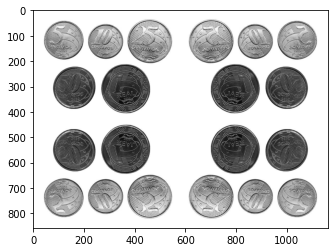

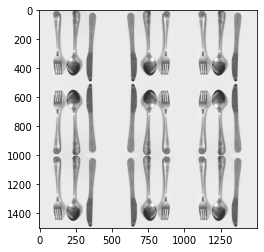

In [16]:
# Essas funções espelham as imagens
# É necessária para a escolha de diferentes valores de janela

# É usada no limiarização local
def espelhamento(img_):
    # A imagem original fica no canto superior esquerdo
    img = pylab.copy(img_)
    
    h1 = img
    
    h2 = pylab.fliplr(h1)
    
    h3 = pylab.flipud(h1)
    
    h4 = pylab.flipud(h2)
    
    h5 = pylab.concatenate((h1,h2),axis=1)
    
    h6 = pylab.concatenate((h3,h4),axis=1)
    
    h7 = pylab.concatenate((h5,h6))
    
    img = h7

    return img

im_esp = espelhamento(moedas_cinza)
pylab.imshow(im_esp, pylab.cm.gray);
pylab.show()

# É usada no filtro da mediana
def espelhamento_completo(img_):
    # a imagem original fica no centro
    img = pylab.copy(img_)
    
    h1 = img
    
    h2 = pylab.fliplr(h1)
    
    h3 = pylab.flipud(h1)
    
    h4 = pylab.flipud(h2)
    
    h5 = pylab.concatenate((h4,h3,h4),axis=1)

    h6 = pylab.concatenate((h2,h1,h2),axis=1)
    
    h8 = pylab.concatenate((h5,h6, h5))
    
    img = h8

    return img

im_esp = espelhamento_completo(talheres_cinza)
pylab.imshow(im_esp, pylab.cm.gray);
pylab.show()

In [17]:
# Mediana

def filtro_mediana(img_, n_kernel):
    img = pylab.copy(img_)
    a,b = img.shape
    
    img_esp = espelhamento_completo(img)
    # para fazer a média das bordas

    for i in range(0,a):
        for j in range(0,b):
            lista = []
            for k_i in range(0, n_kernel):
                for k_j in range(0, n_kernel):
                    # pego os valores da janela
                    # A imagem correta, está no centro da imagem espelhada
                    # Eu percorro só o tamanho da imagem correta
                    # e descolo a janela pela metada, para o pixel ficar no centro da janela

                    # Isso tudo faz o filtro da mediana ficar bem lento
                    # Mas é a forma correta de fazer a filtragem dos cantos com a imagem espelhada
                    lista.append(img_esp[i+a+k_i-(n_kernel//2),j+b+k_j-(n_kernel//2)])

            lista = pylab.array(lista)
            # calculo a mediana
            med = pylab.median(lista)
            
            img[i, j] = med 

    return img

# Limiarização

In [18]:
#Tipos requeridos: Global e Local
def limiarizacao(img, tipo='glo', n_janela=5):
    
    if tipo == 'glo': 
        return limiarizacao_global(img)

    elif tipo == 'loc': 
        return limiarizacao_local(img, n_janela)

    else: 
        print("Tipo inválido")

In [19]:
# Global
def limiarizacao_global(img_): 
    img = pylab.copy(img_)
    
    limiar = pylab.mean(img) # a média da imagem é o limiar
    a, b = img.shape
    
    for i in range(0, a):
        for j in range(0,b): 
            if img[i,j] < limiar: 
                img[i,j] = 255
            else:
                img[i,j] = 0
    return img

In [20]:
# Local

def limiarizacao_local(img_, n_janela): 
    img = pylab.copy(img_)
    a, b = img.shape

    img_esp = espelhamento(img)

    for i in range(0, a, n_janela): 
        for j in range(0, b, n_janela): 
            lista = []
            for n_i in range(0, n_janela):
                for n_j in range(0, n_janela): 
                    # analiso cada janela, e pego os valores
                    lista.append(img_esp[i+n_i,j+n_j])
        
            lista = pylab.array(lista)
            # limiar é a média da janela
            limiar = pylab.mean(lista)

            for n_i in range(0, n_janela):
                for n_j in range(0, n_janela): 
                    if i+n_i < a and j+n_j < b:
                        # Substituo os valores
                        if img[i+n_i,j+n_j] < limiar:
                            img[i+n_i,j+n_j] = 255
                        else: 
                            img[i+n_i,j+n_j] = 0
    return img

# Detecção de bordas

In [21]:
# Tipos requeridos: Roberts e Prewitt
def deteccao_de_bordas(img, tipo='prew'):

    if tipo == 'prew': 
        return deteccao_prewitt(img)

    elif tipo == 'robe': 
        return deteccao_prewitt(img)

    else: 
        print("Tipo inválido")

In [22]:
# funcão do calc do gradiente, com a imagem e as duas mascaras
def gradiente(f,h1,h2):
    return pylab.sqrt( (signal.convolve2d(f, h1, 'same','symm')**2) + ((signal.convolve2d(f, h2,'same','symm')**2)))

In [23]:
def deteccao_roberts(img_):
    img = pylab.copy(img_)

    # mascaras h1 e h2 do Roberts
    h1 = pylab.array([[1,0],[0,-1]])
    h2 = pylab.array([[0,1],[-1,0]])

    img = gradiente(img, h1, h2)
    return img

In [24]:
def deteccao_prewitt(img_):
    img = pylab.copy(img_)

    # mascaras h1 e h2 do Prewitt
    h1 = pylab.array([[-1,-1,-1], [ 0,0,0], [ 1,1,1]])
    h2 = pylab.array([[-1, 0, 1], [-1,0,1], [-1,0,1]])

    img = gradiente(img, h1, h2)
    return img

    
# Aplicando na Imagem com Moedas

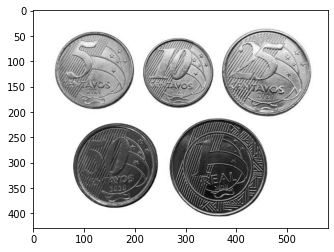

In [25]:
# Imagem 1
pylab.imshow(moedas_cinza, pylab.cm.gray);
img = moedas_cinza

## C1a
##### Ajuste de Contraste: Linear

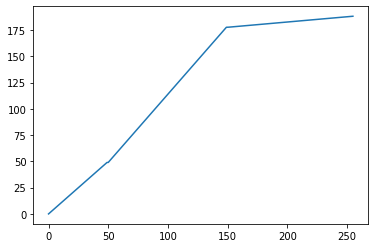

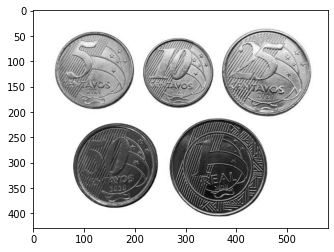

In [26]:
# Ajuste de contraste
# Linear

im_ajustada = ajuste_de_contraste(img = img, tipo = 'lin',  k0=1, k1=1.3, k2=0.1, l_1=50, l_2=150, graficos = True)
pylab.imshow(im_ajustada, pylab.cm.gray);

##### Filtragem de ruído: Gaussiana

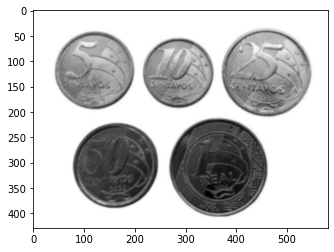

In [27]:
# Filtro de ruído
# Gaussiano

img_filtrada = filtro_de_imagem(im_ajustada, tipo = 'gaus', n_kernel = 25, sig = 1.3)
pylab.imshow(img_filtrada, pylab.cm.gray);

##### Limiarização: Global

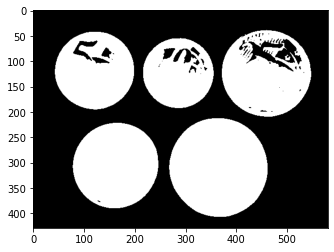

In [28]:
# Limiarização
# Global

img_limiarizada = limiarizacao(img_filtrada, tipo='glo')
pylab.imshow(img_limiarizada, pylab.cm.gray);

##### Detecção de Bordas: Roberts

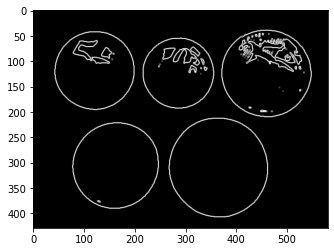

In [29]:
# Detecção de Bordas
# Roberts

img_bordas = deteccao_de_bordas(img_limiarizada, tipo='robe')
pylab.imshow(img_bordas, pylab.cm.gray);

## C1b
##### Ajuste de Contraste: Linear

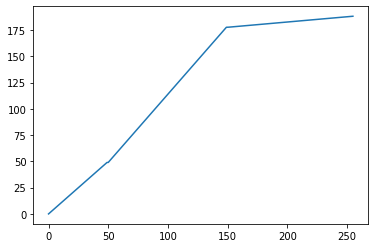

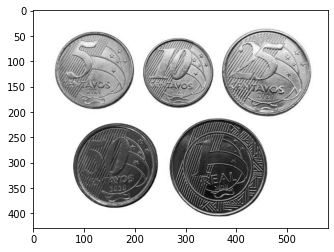

In [30]:
# Ajuste de contraste
# Linear

im_ajustada = ajuste_de_contraste(img = img, tipo = 'lin',  k0=1, k1=1.3, k2=0.1, l_1=50, l_2=150, graficos = True)
pylab.imshow(im_ajustada, pylab.cm.gray);

##### Filtragem de ruído: Mediana

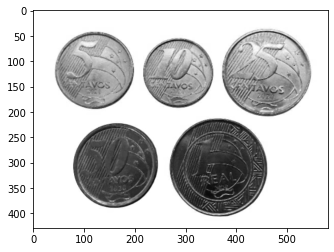

In [31]:
# Filtro de ruído
# Mediana

img_filtrada = filtro_de_imagem(im_ajustada, tipo = 'medi', n_kernel = 3)
pylab.imshow(img_filtrada, pylab.cm.gray);

##### Limiarização: Global

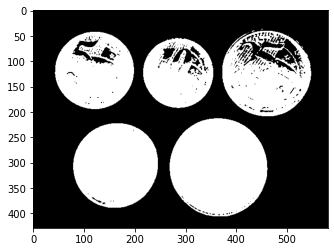

In [32]:
# Limiarização
# Global

img_limiarizada = limiarizacao(img_filtrada, tipo='glo')
pylab.imshow(img_limiarizada, pylab.cm.gray);

##### Detecção de Bordas: Prewitt

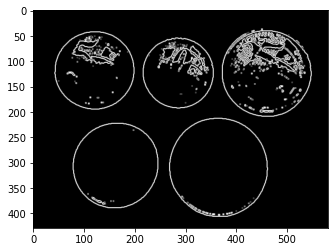

In [33]:
# Detecção de Bordas
# Prewitt

img_bordas = deteccao_de_bordas(img_limiarizada, tipo='prew')
pylab.imshow(img_bordas, pylab.cm.gray);

## C2a
##### Ajuste de Contraste: Exponencial ou Logaritmo --> logarítmica

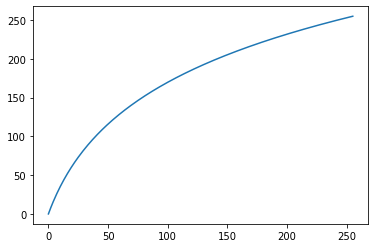

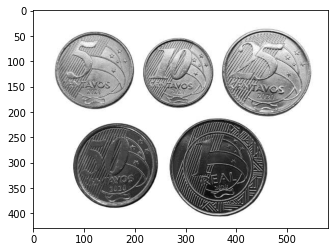

In [34]:
# Ajuste de contraste
# Logaritmo

im_ajustada = ajuste_de_contraste(img = img, tipo = 'log',  k0=0.04, graficos = True)
pylab.imshow(im_ajustada, pylab.cm.gray);

##### Filtragem de ruído: Gaussiana

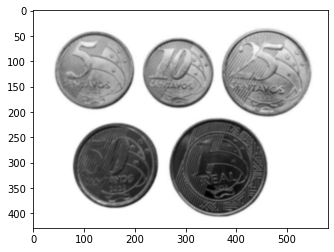

In [35]:
# Filtro de ruído
# Gaussiano

img_filtrada = filtro_de_imagem(im_ajustada, tipo = 'gaus', n_kernel = 9, sig = 1.3)
pylab.imshow(img_filtrada, pylab.cm.gray);

##### Limiarização: Local

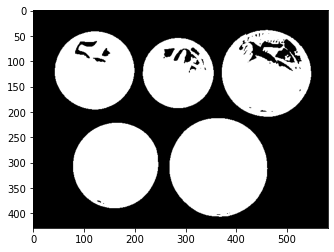

In [36]:
# Limiarização
# Local

img_limiarizada = limiarizacao(img_filtrada, tipo='loc', n_janela=290)
pylab.imshow(img_limiarizada, pylab.cm.gray);

##### Detecção de Bordas: Roberts

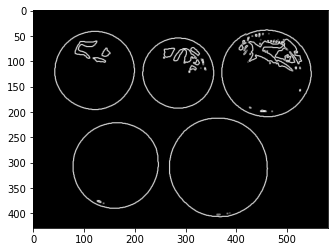

In [37]:
# Detecção de Bordas
# Roberts

img_bordas = deteccao_de_bordas(img_limiarizada, tipo='robe')
pylab.imshow(img_bordas, pylab.cm.gray);

## C2b
##### Ajuste de Contraste: Exponencial/Logaritmo --> Exponencial

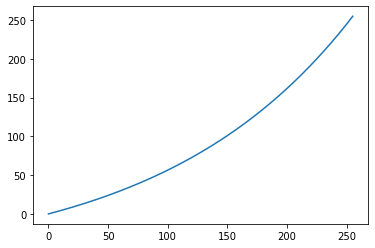

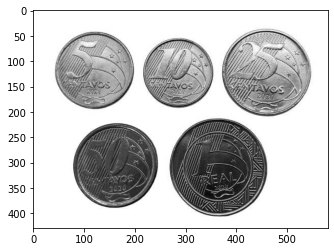

In [38]:
# Ajuste de contraste
# Exp/Log (Exponencial)

im_ajustada = ajuste_de_contraste(img = img, tipo = 'exp',  k0=0.009, graficos = True)
pylab.imshow(im_ajustada, pylab.cm.gray);

##### Filtragem de Ruído: Mediana

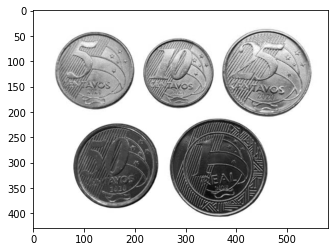

In [39]:
# Filtro de ruído
# Mediana

img_filtrada = filtro_de_imagem(im_ajustada, tipo = 'medi', n_kernel = 2)
pylab.imshow(img_filtrada, pylab.cm.gray);

##### Limiarização: Local

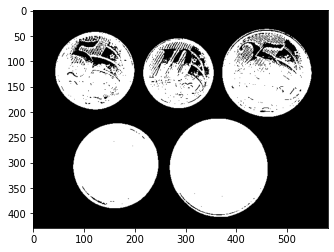

In [40]:
# Limiarização
# Local

img_limiarizada = limiarizacao(img_filtrada, tipo='loc', n_janela=375)
pylab.imshow(img_limiarizada, pylab.cm.gray);

##### Detecção de Bordas: Prewitt

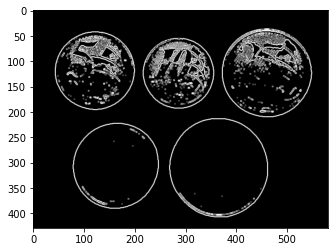

In [41]:
# Detecção de Bordas
# Prewitt

img_bordas = deteccao_de_bordas(img_limiarizada, tipo='prew')
pylab.imshow(img_bordas, pylab.cm.gray);

    
# Aplicando na imagem com Talheres

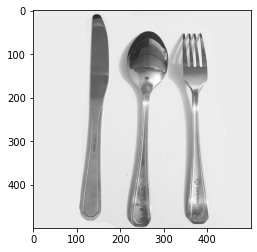

In [42]:
# Imagem 2
pylab.imshow(talheres_cinza, pylab.cm.gray);
img = talheres_cinza

## C1a
##### Ajuste de Contraste: Linear

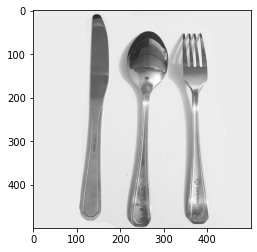

In [43]:
# Ajuste de contraste
# Linear

im_ajustada = ajuste_de_contraste(img = img, tipo = 'lin',  k0=1, k1=1.3, k2=0.1, l_1=50, l_2=150, graficos = False)
pylab.imshow(im_ajustada, pylab.cm.gray);

##### Filtragem de Ruídos: Gaussiana

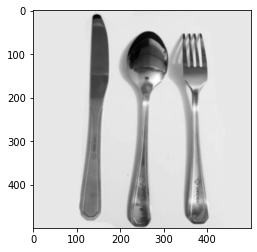

In [44]:
# Filtro de ruído
# Gaussiano

img_filtrada = filtro_de_imagem(im_ajustada, tipo = 'gaus', n_kernel = 7, sig = 1.)
pylab.imshow(img_filtrada, pylab.cm.gray);

##### Limiarização: Global

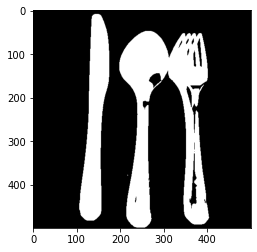

In [45]:
# Limiarização
# Global

img_limiarizada = limiarizacao(img_filtrada, tipo='glo')
pylab.imshow(img_limiarizada, pylab.cm.gray);

##### Detecção de Bordas: Roberts

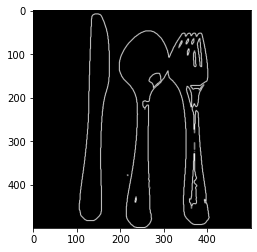

In [46]:
# Detecção de Bordas
# Roberts

img_bordas = deteccao_de_bordas(img_limiarizada, tipo='robe')
pylab.imshow(img_bordas, pylab.cm.gray);

## C1b
##### Ajuste de Contraste: Linear

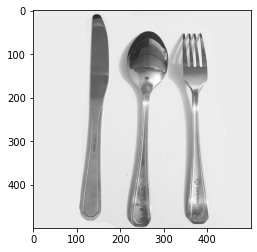

In [47]:
# Ajuste de contraste
# Linear

im_ajustada = ajuste_de_contraste(img = img, tipo = 'lin',  k0=1, k1=1.3, k2=0.1, l_1=50, l_2=150, graficos = False)
pylab.imshow(im_ajustada, pylab.cm.gray);

##### Filtragem de Ruídos: Mediana

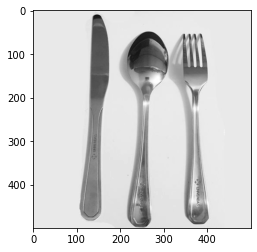

In [48]:
# Filtro de ruído
# Mediana

img_filtrada = filtro_de_imagem(im_ajustada, tipo = 'medi', n_kernel = 2)
pylab.imshow(img_filtrada, pylab.cm.gray);

##### Limiarização: Global

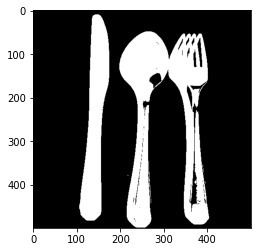

In [49]:
# Limiarização
# Global

img_limiarizada = limiarizacao(img_filtrada, tipo='glo')
pylab.imshow(img_limiarizada, pylab.cm.gray);

##### Detecção de Bordas: Prewitt

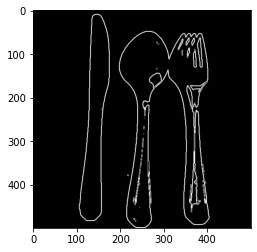

In [50]:
# Detecção de Bordas
# Prewitt

img_bordas = deteccao_de_bordas(img_limiarizada, tipo='prew')
pylab.imshow(img_bordas, pylab.cm.gray);

## C2a
##### Ajuste de Contraste: Exponencial ou Logarítmica --> logarítmica

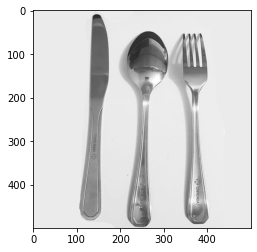

In [51]:
# Ajuste de contraste
# Exp/Log (Logaritmo)

im_ajustada = ajuste_de_contraste(img = img, tipo = 'log',  k0=0.04, graficos = False)
pylab.imshow(im_ajustada, pylab.cm.gray);

##### Filtragem de Ruídos: Gaussiana

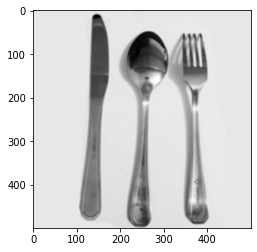

In [52]:
# Filtro de ruído
# Gaussiano

img_filtrada = filtro_de_imagem(im_ajustada, tipo = 'gaus', n_kernel = 5, sig = 1.5)
pylab.imshow(img_filtrada, pylab.cm.gray);

##### Limiarização: Local

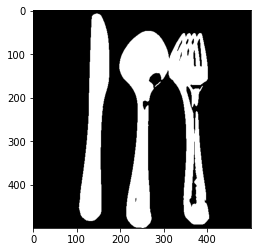

In [53]:
# Limiarização
# Local

img_limiarizada = limiarizacao(img_filtrada, tipo='loc', n_janela=400)
pylab.imshow(img_limiarizada, pylab.cm.gray);

##### Detecção de Bordas: Roberts

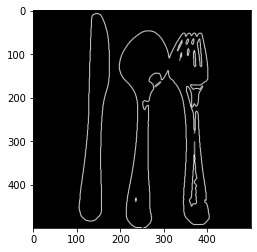

In [54]:
# Detecção de Bordas
# Roberts

img_bordas = deteccao_de_bordas(img_limiarizada, tipo='robe')
pylab.imshow(img_bordas, pylab.cm.gray);

## C2b
##### Ajuste de Contraste: Exponencial ou Logarítmica --> exponencial

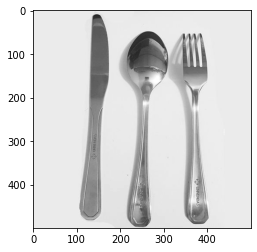

In [55]:
# Ajuste de contraste
# Exp/Log (Exponencial)

im_ajustada = ajuste_de_contraste(img = img, tipo = 'exp',  k0=0.009, graficos = False)
pylab.imshow(im_ajustada, pylab.cm.gray);

##### Filtragem de Ruídos: Mediana

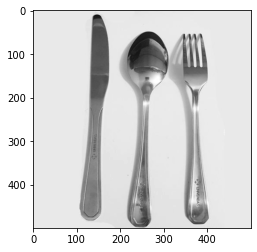

In [56]:
# Filtro de ruído
# Mediana

img_filtrada = filtro_de_imagem(im_ajustada, tipo = 'medi', n_kernel = 2)
pylab.imshow(img_filtrada, pylab.cm.gray);

##### Limiarização: Local

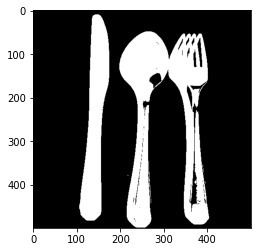

In [57]:
# Limiarização
# Local

img_limiarizada = limiarizacao(img_filtrada, tipo='loc', n_janela=500)
pylab.imshow(img_limiarizada, pylab.cm.gray);

##### Detecção de Bordas: Prewitt

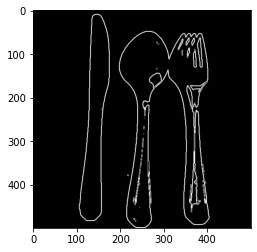

In [58]:
# Detecção de Bordas
# Prewitt

img_bordas = deteccao_de_bordas(img_limiarizada, tipo='prew')
pylab.imshow(img_bordas, pylab.cm.gray);

    
# Aplicando na Imagem com Bolas de Sinuca

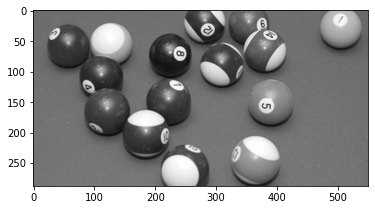

In [59]:
# Imagem 3
pylab.imshow(bolas_cinza, pylab.cm.gray);
img = bolas_cinza

## C1a
##### Ajuste de Contraste: Linear

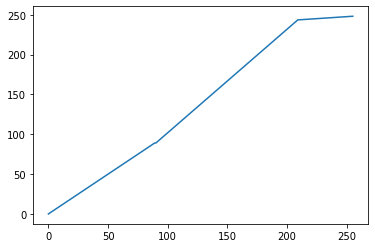

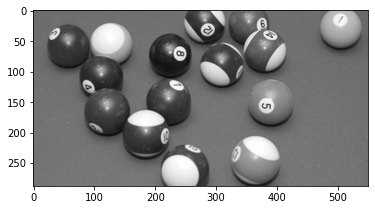

In [60]:
# Ajuste de contraste
# Linear

im_ajustada = ajuste_de_contraste(img = img, tipo = 'lin',  k0=1, k1=1.3, k2=0.1, l_1=90, l_2=210, graficos = True)
pylab.imshow(im_ajustada, pylab.cm.gray);

##### Filtragem de Ruídos: Gaussiana

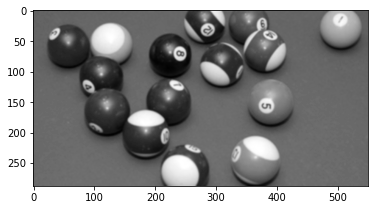

In [61]:
# Filtro de ruído
# Gaussiano

img_filtrada = filtro_de_imagem(im_ajustada, tipo = 'gaus', n_kernel = 5, sig = 1.)
pylab.imshow(img_filtrada, pylab.cm.gray);

##### Limiarização: Global

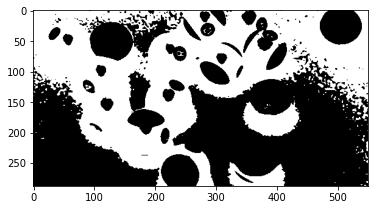

In [62]:
# Limiarização
# Global

img_limiarizada = limiarizacao(img_filtrada, tipo='glo')
pylab.imshow(img_limiarizada, pylab.cm.gray);

##### Detecção de Bordas: Roberts

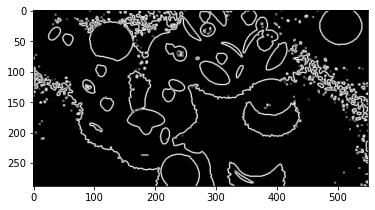

In [63]:
# Detecção de Bordas
# Roberts

img_bordas = deteccao_de_bordas(img_limiarizada, tipo='robe')
pylab.imshow(img_bordas, pylab.cm.gray);

## C1b
##### Ajuste de Contraste: Linear

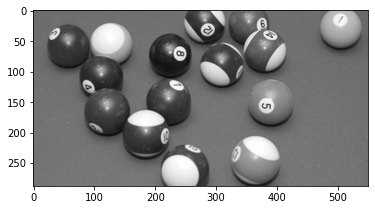

In [64]:
# Ajuste de contraste
# Linear

im_ajustada = ajuste_de_contraste(img = img, tipo = 'lin',  k0=1, k1=1.3, k2=0.1, l_1=90, l_2=210, graficos = False)
pylab.imshow(im_ajustada, pylab.cm.gray);

##### Filtragem de Ruídos: Mediana

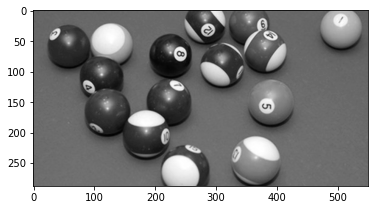

In [65]:
# Filtro de ruído
# Mediana

img_filtrada = filtro_de_imagem(im_ajustada, tipo = 'medi', n_kernel = 2)
pylab.imshow(img_filtrada, pylab.cm.gray);

##### Limiarização: Global

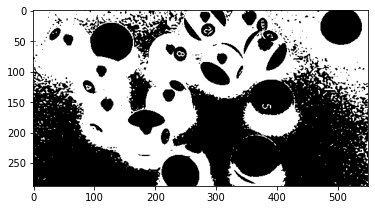

In [66]:
# Limiarização
# Global

img_limiarizada = limiarizacao(img_filtrada, tipo='glo')
pylab.imshow(img_limiarizada, pylab.cm.gray);

##### Detecção de Bordas: Prewitt

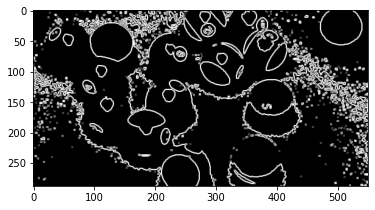

In [67]:
# Detecção de Bordas
# Prewitt

img_bordas = deteccao_de_bordas(img_limiarizada, tipo='prew')
pylab.imshow(img_bordas, pylab.cm.gray);

## C2a
##### Ajuste de Contraste: Exponencial ou Logarítmica --> logarítmica

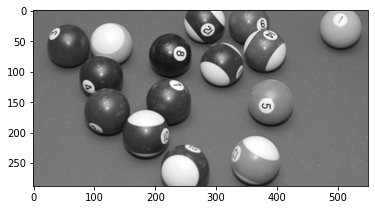

In [68]:
# Ajuste de contraste
# Exp/Log (Logaritmo)

im_ajustada = ajuste_de_contraste(img = img, tipo = 'log',  k0=0.07, graficos = False)
pylab.imshow(im_ajustada, pylab.cm.gray);

##### Filtragem de Ruídos: Gaussiana

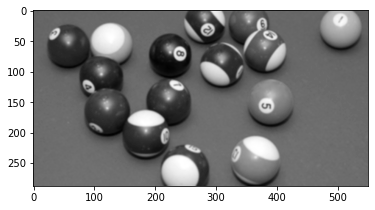

In [69]:
# Filtro de ruído
# Gaussiano

img_filtrada = filtro_de_imagem(im_ajustada, tipo = 'gaus', n_kernel = 5, sig = 1.)
pylab.imshow(img_filtrada, pylab.cm.gray);

##### Limiarização: Local

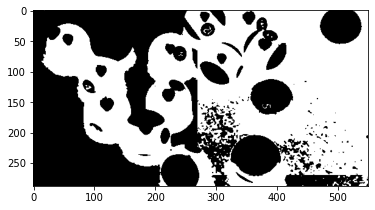

In [70]:
# Limiarização
# Local

img_limiarizada = limiarizacao(img_filtrada, tipo='loc', n_janela=270)
pylab.imshow(img_limiarizada, pylab.cm.gray);

##### Detecção de Bordas: Roberts

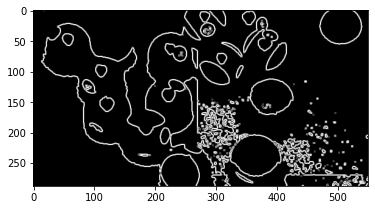

In [71]:
# Detecção de Bordas
# Roberts

img_bordas = deteccao_de_bordas(img_limiarizada, tipo='robe')
pylab.imshow(img_bordas, pylab.cm.gray);

## C2b
##### Ajuste de Contraste: Exponencial ou Logarítmica --> Exponencial

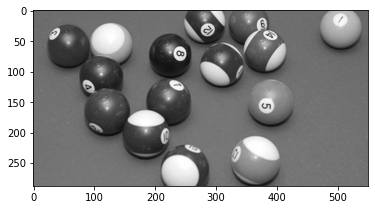

In [72]:
# Ajuste de contraste
# Exp/Log (Exponencial)

im_ajustada = ajuste_de_contraste(img = img, tipo = 'exp',  k0=0.04, graficos = False)
pylab.imshow(im_ajustada, pylab.cm.gray);

##### Filtragem de Ruídos: Mediana

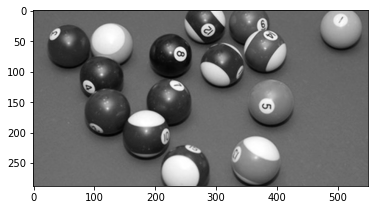

In [73]:
# Filtro de ruído
# Mediana

img_filtrada = filtro_de_imagem(im_ajustada, tipo = 'medi', n_kernel = 2)
pylab.imshow(img_filtrada, pylab.cm.gray);

##### Limiarização: Local

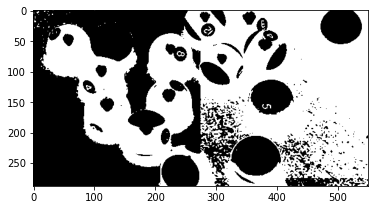

In [74]:
# Limiarização
# Local

img_limiarizada = limiarizacao(img_filtrada, tipo='loc', n_janela=275)
pylab.imshow(img_limiarizada, pylab.cm.gray);

##### Detecção de Bordas: Prewitt

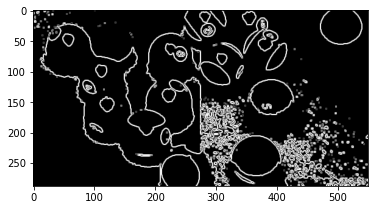

In [75]:
# Detecção de Bordas
# Prewitt

img_bordas = deteccao_de_bordas(img_limiarizada, tipo='prew')
pylab.imshow(img_bordas, pylab.cm.gray);